In [179]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim
from tqdm.notebook import tqdm

In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
batch_size = 4

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [6]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [9]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

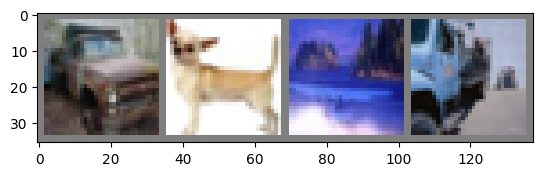

truck dog   plane truck


In [32]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [163]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self,x):
        
        # use a single pool layer instead of using
        # F.max_pool2d
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [164]:
criterion=nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

loop

In [165]:
for epoch in range(2):
    
    running_loss = 0.0
        
    for i, (inputs, labels) in notebook.tqdm(enumerate(trainloader,0),total=len(trainloader)):

        optimizer.zero_grad()
        
        output = net(inputs)

        loss   = criterion(output, labels)

        loss.backward()

        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 2.178
[1,  4000] loss: 1.872
[1,  6000] loss: 1.705
[1,  8000] loss: 1.597
[1, 10000] loss: 1.553
[1, 12000] loss: 1.481


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.402
[2,  4000] loss: 1.395
[2,  6000] loss: 1.364
[2,  8000] loss: 1.352
[2, 10000] loss: 1.310
[2, 12000] loss: 1.314


In [166]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## inference

In [167]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [168]:
dataiter = iter(testloader)

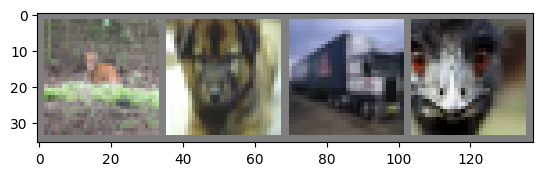

GroundTruth:  deer  dog   truck bird 
Predicted:  deer  dog   truck frog 


In [177]:
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [180]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

  0%|          | 0/2500 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 52 %
